### Business problem overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

#### Three phases of customer lifecycle :
- The good phase (June and July)
- The action phase (August)
- The churn phase (September)

### Importing libraries

In [1]:
# Let's add required library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import regex


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

pd.set_option("display.max_rows",300)
pd.set_option("display.max_columns",300)

import warnings
warnings.filterwarnings("ignore")

### Reading the dataset in pandas dataframe

In [2]:
#Let's read the data
# Get the dataset
telecom_df = pd.read_csv("telecom_churn_data.csv")

### Validate the dataset

In [3]:
#let's have a look on data
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
telecom_df.shape

(99999, 226)

In [5]:
#Let's have a look on columns and corresposding dtype
telecom_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

###### while looking into data, there are 226 columns in which dtypes: float64(179), int64(35), object(12)

In [6]:
#Let's break in respetive type

#ID
id_cols = ["mobile_number","circle_id"]
#Categorcial
date_cols = [col for col in telecom_df.columns if telecom_df[col].dtype =="object"]  
#Numeric
numeric_cols = [ col for col in telecom_df.columns if col not in date_cols + id_cols]  


In [7]:
#Let's have a look on these columns
print("total cols for ID: ",len(id_cols))
print("---------------------------")
print("total col-dat for date_cols: ",len(date_cols))
print("---------------------------")
print("total colf or numeric_cols: ",len(numeric_cols))

total cols for ID:  2
---------------------------
total col-dat for date_cols:  12
---------------------------
total colf or numeric_cols:  212


### Missing value treatment

We could see that there are many columns having missing values. Lets validate and treat the missing values

In [8]:
#Let's have a look on miising value
null_val = (telecom_df.isnull().sum()/telecom_df.shape[0]).sort_values(ascending = False)
null_val[null_val >0]

arpu_3g_6                   0.748467
night_pck_user_6            0.748467
total_rech_data_6           0.748467
arpu_2g_6                   0.748467
max_rech_data_6             0.748467
fb_user_6                   0.748467
av_rech_amt_data_6          0.748467
date_of_last_rech_data_6    0.748467
count_rech_2g_6             0.748467
count_rech_3g_6             0.748467
date_of_last_rech_data_7    0.744287
total_rech_data_7           0.744287
fb_user_7                   0.744287
max_rech_data_7             0.744287
night_pck_user_7            0.744287
count_rech_2g_7             0.744287
av_rech_amt_data_7          0.744287
arpu_2g_7                   0.744287
count_rech_3g_7             0.744287
arpu_3g_7                   0.744287
total_rech_data_9           0.740777
count_rech_3g_9             0.740777
fb_user_9                   0.740777
max_rech_data_9             0.740777
arpu_3g_9                   0.740777
date_of_last_rech_data_9    0.740777
night_pck_user_9            0.740777
a

###### There are some meaningfull missing null value,Let's have a look on it.
when total_rech_data and date_of_last_rech_data are null, 
so total,Max and Avg reacharge for 6,7,8 and 9 woule be null
This can be imputed as zero

In [9]:
#Let's look on the data
telecom_df[telecom_df["total_rech_data_6"].isna() & telecom_df["date_of_last_rech_data_6"].isna()][["date_of_last_rech_data_6","total_rech_data_6","max_rech_data_6","max_rech_data_6","av_rech_amt_data_6"]]

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,max_rech_data_6,av_rech_amt_data_6
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
99991,NaN,NaN,NaN,NaN,NaN
99992,NaN,NaN,NaN,NaN,NaN
99993,NaN,NaN,NaN,NaN,NaN
99994,NaN,NaN,NaN,NaN,NaN


In [10]:
#Let's imptue with zero value
zero_impute_cols = ['total_rech_data_6','av_rech_amt_data_6', 'max_rech_data_6',
                    'total_rech_data_7','av_rech_amt_data_7', 'max_rech_data_7',
                    'total_rech_data_8','av_rech_amt_data_8', 'max_rech_data_8',
                    'total_rech_data_9','av_rech_amt_data_9', 'max_rech_data_9']
                    
telecom_df[zero_impute_cols] = telecom_df[zero_impute_cols].apply(lambda x: x.fillna(0))

In [11]:
#Let's verify it
telecom_df[zero_impute_cols].head(10)

,total_rech_data_6,av_rech_amt_data_6,max_rech_data_6,total_rech_data_7,av_rech_amt_data_7,max_rech_data_7,total_rech_data_8,av_rech_amt_data_8,max_rech_data_8,total_rech_data_9,av_rech_amt_data_9,max_rech_data_9
0,1.0,252.0,252.0,1.0,252.0,252.0,1.0,252.0,252.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,154.0,154.0,2.0,50.0,25.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,46.0,46.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,56.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,2.0,177.0,154.0,3.0,69.0,23.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,154.0,154.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#Let's drop ID and Date columns sine those ae not reuired.
telecom_df.drop(columns=id_cols,inplace=True)
telecom_df.drop(columns=date_cols,inplace=True)

In [13]:
#Let's verify the size of df
telecom_df.shape

(99999, 212)

In [14]:
#Let's look on 6 month's data
month_6_cols = [col for col in telecom_df.columns if "_6" in col]
telecom_df[month_6_cols].head()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2c_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_t2o_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,last_day_rch_amt_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6
0,197.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,4,362,252,252,1.0,252.0,0.0,1.0,252.0,30.13,83.57,212.17,212.17,0.0,0,0,1,0,1.0
1,34.047,24.11,15.74,0.0,0.0,23.88,11.51,0.00,0.0,35.39,0.23,0.00,0.00,0.0,0.23,0.0,4.68,0.00,40.31,1.61,17.48,0.00,19.09,0.00,5.90,0.00,0.0,5.90,26.83,0.00,1.83,0.00,4,74,44,44,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
2,167.690,11.54,143.33,0.0,0.0,7.19,29.34,24.11,0.0,60.66,4.34,41.81,1.48,0.0,47.64,0.0,46.56,0.45,155.33,115.69,14.38,99.48,229.56,72.41,45.18,21.73,0.0,139.33,370.04,0.21,0.00,0.93,5,168,86,0,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
3,221.338,99.91,123.31,0.0,0.0,73.68,107.43,1.91,0.0,183.03,26.23,2.99,0.00,0.0,29.23,0.0,10.96,0.00,223.23,62.08,113.96,57.43,233.48,43.48,1.33,1.18,0.0,45.99,280.08,0.59,0.00,0.00,10,230,60,30,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
4,261.636,50.31,76.96,0.0,0.0,50.31,67.64,0.00,0.0,117.96,0.00,9.31,0.00,0.0,9.31,0.0,0.00,0.00,127.28,105.68,106.84,1.50,214.03,0.00,1.93,0.00,0.0,1.93,216.44,0.00,0.00,0.48,5,196,56,50,1.0,56.0,1.0,0.0,56.0,0.00,0.00,0.00,0.00,0.0,0,1,0,0,0.0


In [15]:
# Let's have a look again for null values
null_val = (telecom_df.isnull().sum()/len(telecom_df)).sort_values(ascending = False).head(50)
null_val[null_val > 0]

count_rech_2g_6     0.748467
night_pck_user_6    0.748467
fb_user_6           0.748467
arpu_2g_6           0.748467
arpu_3g_6           0.748467
count_rech_3g_6     0.748467
count_rech_2g_7     0.744287
count_rech_3g_7     0.744287
night_pck_user_7    0.744287
arpu_3g_7           0.744287
arpu_2g_7           0.744287
fb_user_7           0.744287
night_pck_user_9    0.740777
arpu_3g_9           0.740777
count_rech_3g_9     0.740777
fb_user_9           0.740777
arpu_2g_9           0.740777
count_rech_2g_9     0.740777
arpu_3g_8           0.736607
arpu_2g_8           0.736607
night_pck_user_8    0.736607
count_rech_2g_8     0.736607
fb_user_8           0.736607
count_rech_3g_8     0.736607
std_og_mou_9        0.077451
std_og_t2c_mou_9    0.077451
loc_ic_t2t_mou_9    0.077451
isd_og_mou_9        0.077451
std_og_t2f_mou_9    0.077451
og_others_9         0.077451
std_ic_t2t_mou_9    0.077451
loc_ic_t2m_mou_9    0.077451
loc_ic_t2f_mou_9    0.077451
loc_ic_mou_9        0.077451
std_ic_t2m_mou

The Night_Pack and FB_User columns are categorical column for 6.7,8 and 9 months.

In [16]:
#Let's look unique value for nighpack
categorical_cols = ["night_pck_user_6","night_pck_user_7","night_pck_user_8","night_pck_user_9","fb_user_6","fb_user_7","fb_user_8","fb_user_9"]
telecom_df[categorical_cols].isna().sum()/telecom_df.shape[0]

night_pck_user_6    0.748467
night_pck_user_7    0.744287
night_pck_user_8    0.736607
night_pck_user_9    0.740777
fb_user_6           0.748467
fb_user_7           0.744287
fb_user_8           0.736607
fb_user_9           0.740777
dtype: float64

In [17]:
#Let's look for unique value for one of the column
telecom_df["night_pck_user_6"].unique()

array([ 0., nan,  1.])

In [18]:
#So, we can assigne as -1 value
telecom_df[categorical_cols] = telecom_df[categorical_cols].fillna(-1)

In [19]:
#Let's verify it
telecom_df[categorical_cols].isna().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

In [20]:
# Let's have a look again for null values
null_val = (telecom_df.isnull().sum()/len(telecom_df)).sort_values(ascending = False).head(50)
null_val[null_val > 0]

arpu_3g_6           0.748467
count_rech_3g_6     0.748467
count_rech_2g_6     0.748467
arpu_2g_6           0.748467
arpu_3g_7           0.744287
count_rech_3g_7     0.744287
count_rech_2g_7     0.744287
arpu_2g_7           0.744287
count_rech_3g_9     0.740777
arpu_3g_9           0.740777
arpu_2g_9           0.740777
count_rech_2g_9     0.740777
count_rech_2g_8     0.736607
count_rech_3g_8     0.736607
arpu_2g_8           0.736607
arpu_3g_8           0.736607
std_og_t2t_mou_9    0.077451
std_og_t2m_mou_9    0.077451
std_og_t2f_mou_9    0.077451
std_og_t2c_mou_9    0.077451
std_og_mou_9        0.077451
spl_og_mou_9        0.077451
og_others_9         0.077451
std_ic_t2t_mou_9    0.077451
loc_ic_t2t_mou_9    0.077451
loc_ic_t2m_mou_9    0.077451
loc_ic_t2f_mou_9    0.077451
loc_ic_mou_9        0.077451
loc_og_t2c_mou_9    0.077451
std_ic_t2m_mou_9    0.077451
std_ic_t2o_mou_9    0.077451
std_ic_mou_9        0.077451
spl_ic_mou_9        0.077451
isd_ic_mou_9        0.077451
ic_others_9   

In [21]:
#Let's drop columns having more than 70% of missing value
for col in telecom_df.columns:
    if (telecom_df[col].isna().sum()/len(telecom_df)) > .70:
        telecom_df.drop(columns=[col],inplace=True)

In [22]:
#let's verify it
telecom_df.shape

(99999, 196)

In [23]:
#Let's check null value again
null_val = (telecom_df.isnull().sum()/len(telecom_df)).sort_values(ascending = False).head(50)
null_val[null_val > 0]

std_ic_t2t_mou_9    0.077451
loc_og_t2t_mou_9    0.077451
loc_og_t2f_mou_9    0.077451
loc_og_t2c_mou_9    0.077451
loc_og_mou_9        0.077451
std_og_t2t_mou_9    0.077451
std_og_t2m_mou_9    0.077451
std_og_t2f_mou_9    0.077451
std_og_mou_9        0.077451
isd_og_mou_9        0.077451
spl_og_mou_9        0.077451
og_others_9         0.077451
spl_ic_mou_9        0.077451
loc_ic_t2t_mou_9    0.077451
loc_ic_t2m_mou_9    0.077451
loc_ic_t2f_mou_9    0.077451
loc_ic_mou_9        0.077451
std_ic_t2m_mou_9    0.077451
std_ic_t2f_mou_9    0.077451
std_ic_t2o_mou_9    0.077451
std_ic_mou_9        0.077451
loc_og_t2m_mou_9    0.077451
std_og_t2c_mou_9    0.077451
roam_og_mou_9       0.077451
ic_others_9         0.077451
onnet_mou_9         0.077451
roam_ic_mou_9       0.077451
isd_ic_mou_9        0.077451
offnet_mou_9        0.077451
spl_og_mou_8        0.053781
std_og_t2c_mou_8    0.053781
og_others_8         0.053781
std_og_t2m_mou_8    0.053781
loc_ic_mou_8        0.053781
std_og_t2f_mou

In [24]:
#let's list out those columns which have only one value
df_cols = pd.DataFrame(telecom_df.nunique()).reset_index().rename(columns = {'index': 'columns_name', 0: 'value'})
one_value_cols = df_cols[df_cols['value'] == 1]
one_value_cols

,columns_name,value
0,loc_og_t2o_mou,1
1,std_og_t2o_mou,1
2,loc_ic_t2o_mou,1
55,std_og_t2c_mou_6,1
56,std_og_t2c_mou_7,1
57,std_og_t2c_mou_8,1
58,std_og_t2c_mou_9,1
107,std_ic_t2o_mou_6,1
108,std_ic_t2o_mou_7,1
109,std_ic_t2o_mou_8,1


In [25]:
#Let's drop thee columns
one_cols = one_value_cols['columns_name'].tolist()
telecom_df.drop(columns=one_cols,inplace=True)

In [26]:
telecom_df.shape

(99999, 185)

In [27]:
#Let's check null value again
null_val = (telecom_df.isnull().sum()/len(telecom_df)).sort_values(ascending = False).head(50)
null_val[null_val > 0]

loc_ic_mou_9        0.077451
loc_og_mou_9        0.077451
std_ic_t2t_mou_9    0.077451
loc_og_t2m_mou_9    0.077451
loc_ic_t2t_mou_9    0.077451
spl_ic_mou_9        0.077451
std_ic_t2f_mou_9    0.077451
loc_og_t2f_mou_9    0.077451
loc_og_t2c_mou_9    0.077451
std_ic_t2m_mou_9    0.077451
loc_ic_t2m_mou_9    0.077451
std_og_t2t_mou_9    0.077451
og_others_9         0.077451
std_ic_mou_9        0.077451
std_og_t2m_mou_9    0.077451
std_og_t2f_mou_9    0.077451
std_og_mou_9        0.077451
spl_og_mou_9        0.077451
loc_og_t2t_mou_9    0.077451
isd_og_mou_9        0.077451
roam_og_mou_9       0.077451
roam_ic_mou_9       0.077451
loc_ic_t2f_mou_9    0.077451
onnet_mou_9         0.077451
offnet_mou_9        0.077451
isd_ic_mou_9        0.077451
ic_others_9         0.077451
std_og_mou_8        0.053781
std_ic_t2f_mou_8    0.053781
ic_others_8         0.053781
loc_ic_mou_8        0.053781
loc_ic_t2m_mou_8    0.053781
std_og_t2f_mou_8    0.053781
std_ic_mou_8        0.053781
og_others_8   

In [28]:
# while looking into data, most of data belongs to mou, Let's impute with zero,rather than other
telecom_df = telecom_df.fillna(0)

In [29]:
#Let's verify null value again
null_val = (telecom_df.isnull().sum()/len(telecom_df)).sort_values(ascending = False).head(50)
null_val[null_val > 0]

Series([], dtype: float64)

In [30]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 185 entries, arpu_6 to sep_vbc_3g
dtypes: float64(152), int64(33)
memory usage: 141.1 MB


###### Let's Derive Filter the High value customer

In [31]:
#Let's calculate total data rechrage amount
telecom_df["total_data_rech_amt_6_tmp"] = telecom_df.total_rech_data_6 * telecom_df.av_rech_amt_data_6
telecom_df["total_data_rech_amt_7_tmp"] = telecom_df.total_rech_data_7 * telecom_df.av_rech_amt_data_7

In [32]:
#Let's calculate total recharge amount
telecom_df["total_rech_amt_6_tmp"] = telecom_df.total_rech_amt_6 + telecom_df.total_data_rech_amt_6_tmp
telecom_df["total_rech_amt_7_tmp"] = telecom_df.total_rech_amt_7 + telecom_df.total_data_rech_amt_7_tmp

In [33]:
#Let's calculate the average amount of 6th and 7th month
telecom_df['avg_amt_6_7_tmp'] = (telecom_df["total_rech_amt_6_tmp"] + telecom_df["total_rech_amt_7_tmp"])/2

In [34]:
#Lets look into it percentile of average amount of 6th and 7th month
telecom_df['avg_amt_6_7_tmp'].quantile(.70)

478.0

In [35]:
#Let's fi;ter the high value customer
tl_high_value = telecom_df[telecom_df["avg_amt_6_7_tmp"]>= telecom_df["avg_amt_6_7_tmp"].quantile(.70)]

In [36]:
#Let's verify it
tl_high_value.shape

(30001, 190)

In [37]:
#Delete the derived columns created in above step
tl_high_value.drop(columns=["total_data_rech_amt_6_tmp","total_data_rech_amt_7_tmp","total_rech_amt_6_tmp","total_rech_amt_7_tmp","avg_amt_6_7_tmp"],inplace=True)

In [38]:
#Let's verify it
tl_high_value.shape

(30001, 185)

In [39]:
tl_high_value.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.5,0.0,6.50,0.00,0.0,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00

### Define target variable

The churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

-	total_ic_mou_9
-	total_og_mou_9
-	vol_2g_mb_9
-	vol_3g_mb_9


#### Let's look on 9th month data(Incoming/outgoing,2g/3g) to decide which customer is churn or not.


In [40]:
#Let's calculate the total calls using incoming and outgoing
tl_high_value['total_calls_9'] = tl_high_value.total_ic_mou_9 + tl_high_value.total_og_mou_9

In [41]:
#Let's calculate the total data consumption using 2g and 3g data
tl_high_value["total_data_consumptions"] = tl_high_value.vol_2g_mb_9 + tl_high_value.vol_3g_mb_9

In [42]:
#Let's derived churn col
tl_high_value["churn"]=tl_high_value.apply(lambda row:1 if (row.total_calls_9==0 and row.total_data_consumptions==0) else 0,axis=1)

In [43]:
#Let's verify it
tl_high_value[['total_calls_9','total_data_consumptions','churn']].head()

,total_calls_9,total_data_consumptions,churn
0,0.00,0.00,1
7,0.00,0.00,1
8,177.09,0.00,0
21,1284.14,0.00,0
23,255.11,328.67,0


In [44]:
#let's drop these columns
tl_high_value.drop(columns=["total_calls_9","total_data_consumptions"],inplace=True)

In [45]:
#Let's see the percantage of churn and non customers
tl_high_value["churn"].value_counts(normalize=True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

In [46]:
#Let's delete the columns related to 9th columns, since churn got calculated.
tl_high_value = tl_high_value.loc[:,~tl_high_value.columns.str.endswith('9')]

In [47]:
tl_high_value.shape

(30001, 141)

# EDA

In [48]:
# Let's validate whether we have data imbalance
tl_high_value["churn"].value_counts(normalize=True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

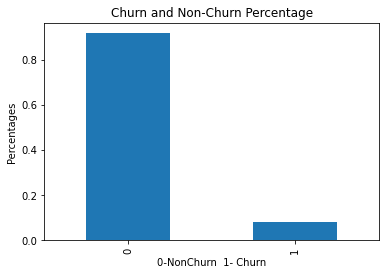

In [49]:
#Let's visualize the curn
tl_high_value["churn"].value_counts(normalize=True).plot.bar(figsize=[6,4])
plt.title("Churn and Non-Churn Percentage")
plt.ylabel("Percentages")
plt.xlabel("0-NonChurn  1- Churn")
plt.show()

In [50]:
#Let's descibe the df for derivation cols
tl_high_value.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957,260.793024,267.819295,234.112539,373.693961,378.103169,335.077044,16.110355,12.642504,

In [51]:
#Let's derive some feature making difference of 8th and previous months.
tl_high_value['total_ic_mou_diff'] = tl_high_value.total_ic_mou_8 - ((tl_high_value.total_ic_mou_6 + tl_high_value.total_ic_mou_7)/2)
tl_high_value['total_og_mou_diff'] = tl_high_value.total_og_mou_8 - ((tl_high_value.total_og_mou_6 + tl_high_value.total_og_mou_7)/2)
tl_high_value['isd_ic_mou_diff'] = tl_high_value.isd_ic_mou_8 - ((tl_high_value.isd_ic_mou_6 + tl_high_value.isd_ic_mou_7)/2)
tl_high_value['arpu_diff'] = tl_high_value.arpu_8 - ((tl_high_value.arpu_6 + tl_high_value.arpu_7)/2)
tl_high_value['roam_ic_mou_diff'] = tl_high_value.roam_ic_mou_8 - ((tl_high_value.roam_ic_mou_6 + tl_high_value.roam_ic_mou_7)/2)
tl_high_value['roam_og_mou_diff'] = tl_high_value.roam_og_mou_8 - ((tl_high_value.roam_og_mou_6 + tl_high_value.roam_og_mou_7)/2)
tl_high_value['loc_og_mou_diff'] = tl_high_value.loc_og_mou_8 - ((tl_high_value.loc_og_mou_6 + tl_high_value.loc_og_mou_7)/2)
tl_high_value['onnet_mou_diff'] = tl_high_value.onnet_mou_8 - ((tl_high_value.onnet_mou_6 + tl_high_value.onnet_mou_7)/2)
tl_high_value['spl_ic_mou_diff'] = tl_high_value.spl_ic_mou_8 - ((tl_high_value.spl_ic_mou_6 + tl_high_value.spl_ic_mou_7)/2)
tl_high_value['std_og_mou_diff'] = tl_high_value.std_og_mou_8 - ((tl_high_value.std_og_mou_6 + tl_high_value.std_og_mou_7)/2)
tl_high_value['isd_og_mou_diff'] = tl_high_value.isd_og_mou_8 - ((tl_high_value.isd_og_mou_6 + tl_high_value.isd_og_mou_7)/2)
tl_high_value['offnet_mou_diff'] = tl_high_value.offnet_mou_8 - ((tl_high_value.offnet_mou_6 + tl_high_value.offnet_mou_7)/2)
tl_high_value['spl_og_mou_diff'] = tl_high_value.spl_og_mou_8 - ((tl_high_value.spl_og_mou_6 + tl_high_value.spl_og_mou_7)/2)
tl_high_value['loc_ic_mou_diff'] = tl_high_value.loc_ic_mou_8 - ((tl_high_value.loc_ic_mou_6 + tl_high_value.loc_ic_mou_7)/2)
tl_high_value['std_ic_mou_diff'] = tl_high_value.std_ic_mou_8 - ((tl_high_value.std_ic_mou_6 + tl_high_value.std_ic_mou_7)/2)
tl_high_value['max_rech_amt_diff'] = tl_high_value.max_rech_amt_8 - ((tl_high_value.max_rech_amt_6 + tl_high_value.max_rech_amt_7)/2)
tl_high_value['total_rech_data_diff'] = tl_high_value.total_rech_data_8 - ((tl_high_value.total_rech_data_6 + tl_high_value.total_rech_data_7)/2)
tl_high_value['max_rech_data_diff'] = tl_high_value.max_rech_data_8 - ((tl_high_value.max_rech_data_6 + tl_high_value.max_rech_data_7)/2)
tl_high_value['av_rech_amt_data_diff'] = tl_high_value.av_rech_amt_data_8 - ((tl_high_value.av_rech_amt_data_6 + tl_high_value.av_rech_amt_data_7)/2)
tl_high_value['total_rech_num_diff'] = tl_high_value.total_rech_num_8 - ((tl_high_value.total_rech_num_6 + tl_high_value.total_rech_num_7)/2)
tl_high_value['vol_2g_mb_diff'] = tl_high_value.vol_2g_mb_8 - ((tl_high_value.vol_2g_mb_6 + tl_high_value.vol_2g_mb_7)/2)
tl_high_value['total_rech_amt_diff'] = tl_high_value.total_rech_amt_8 - ((tl_high_value.total_rech_amt_6 + tl_high_value.total_rech_amt_7)/2)
tl_high_value['vol_3g_mb_diff'] = tl_high_value.vol_3g_mb_8 - ((tl_high_value.vol_3g_mb_6 + tl_high_value.vol_3g_mb_7)/2)

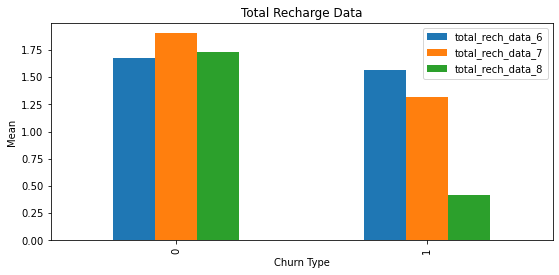

In [52]:
tl_high_value.groupby("churn")["total_rech_data_6","total_rech_data_7","total_rech_data_8" ].mean().plot.bar(figsize=[9,4])
plt.title("Total Recharge Data")
plt.xlabel("Churn Type")
plt.ylabel("Mean")
plt.show()

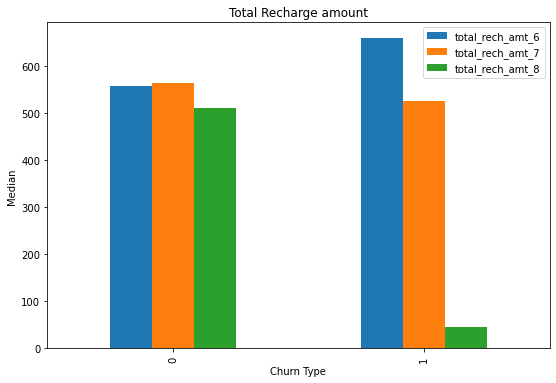

In [53]:
tl_high_value.groupby("churn")["total_rech_amt_6","total_rech_amt_7","total_rech_amt_8" ].median().plot.bar(figsize=[9,6])
plt.title("Total Recharge amount")
plt.xlabel("Churn Type")
plt.ylabel("Median")
plt.show()

<AxesSubplot:xlabel='churn'>

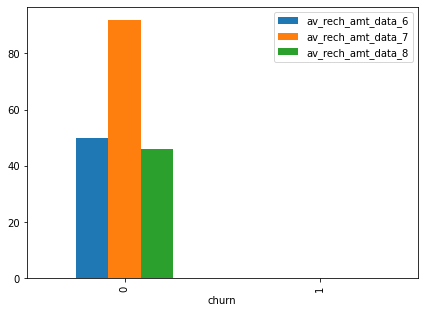

In [54]:
tl_high_value.groupby("churn")["av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8" ].median().plot.bar(figsize=[7,5])

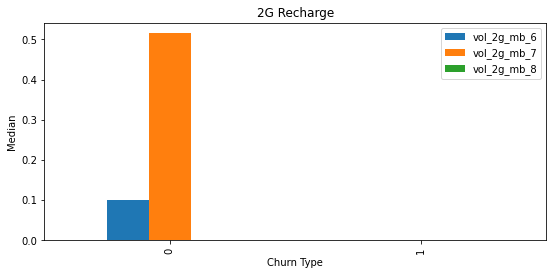

In [55]:
tl_high_value.groupby("churn")["vol_2g_mb_6","vol_2g_mb_7","vol_2g_mb_8" ].median().plot.bar(figsize=[9,4])
plt.title("2G Recharge")
plt.xlabel("Churn Type")
plt.ylabel("Median")
plt.show()

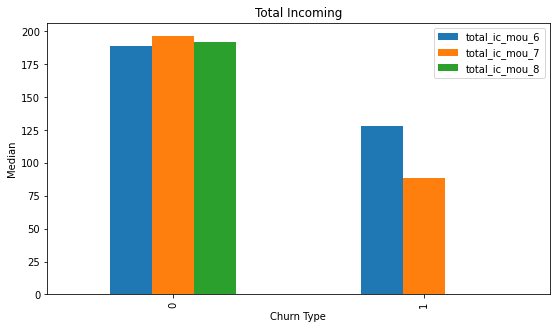

In [56]:
tl_high_value.groupby("churn")["total_ic_mou_6","total_ic_mou_7","total_ic_mou_8"].median().plot.bar(figsize=[9,5])
plt.title("Total Incoming")
plt.xlabel("Churn Type")
plt.ylabel("Median")
plt.show()

# Model Building

### Split train and test Data

In [57]:
#Let's split train and test data
train,test = train_test_split(tl_high_value,test_size=0.2,random_state=48)

In [58]:
#Let's look on shpe of train and test data
print("shape of Train: ",train.shape)
print("shape of Test: ",test.shape)

shape of Train:  (24000, 164)
shape of Test:  (6001, 164)


In [59]:
#Let's compute categorical data to numeric columns
categorical_cols = ["night_pck_user_6","fb_user_6","night_pck_user_7","fb_user_7","night_pck_user_8","fb_user_8"]

print(train.groupby('night_pck_user_6')["churn"].mean())
print(train.groupby('fb_user_6')["churn"].mean())
print(train.groupby('night_pck_user_7')["churn"].mean())
print(train.groupby('fb_user_7')["churn"].mean())
print(train.groupby('night_pck_user_8')["churn"].mean())
print(train.groupby('fb_user_8')["churn"].mean())

night_pck_user_6
-1.0    0.099621
 0.0    0.066717
 1.0    0.098462
Name: churn, dtype: float64
fb_user_6
-1.0    0.099621
 0.0    0.083333
 1.0    0.066233
Name: churn, dtype: float64
night_pck_user_7
-1.0    0.116741
 0.0    0.054784
 1.0    0.058020
Name: churn, dtype: float64
fb_user_7
-1.0    0.116741
 0.0    0.065279
 1.0    0.053977
Name: churn, dtype: float64
night_pck_user_8
-1.0    0.141980
 0.0    0.028647
 1.0    0.019084
Name: churn, dtype: float64
fb_user_8
-1.0    0.141980
 0.0    0.067373
 1.0    0.023955
Name: churn, dtype: float64


In [60]:
#Let's assign calculated mean values on test and train data.
churn_mean_val = { 'night_pck_user_6' : {-1: 0.099621, 0: 0.066717, 1: 0.098462},
                   'fb_user_6'        : {-1: 0.099621, 0: 0.083333, 1: 0.066233},
                   'night_pck_user_7' : {-1: 0.116741, 0: 0.054784, 1: 0.058020},
                   'fb_user_7'        : {-1: 0.116741, 0: 0.065279, 1: 0.053977},
                   'night_pck_user_8' : {-1: 0.141980, 0: 0.028647, 1: 0.019084},
                   'fb_user_8'        : {-1: 0.141980, 0: 0.067373, 1: 0.023955}
                 }


train.replace(churn_mean_val, inplace = True)
test.replace(churn_mean_val, inplace = True)

In [61]:
# segregate  X_train and y_train 
y_train = train.pop("churn")
X_train = train

In [62]:
# Segregate X_test and y_test
y_test = test.pop("churn")
X_test = test

# SMOTE

In [63]:
# Let's use of SMOTE to solve the imbalance data
smote = SMOTE(random_state=48)
X_train_resample,y_train_resample = smote.fit_resample(X_train,y_train)

In [64]:
# Let's look on resample data 
print("shape of resample of X_train_resample: ",X_train_resample.shape)
print("Value count of y_train_resample")
print(y_train_resample.value_counts())

shape of resample of X_train_resample:  (44082, 163)
Value count of y_train_resample
0    22041
1    22041
Name: churn, dtype: int64


## Scalling 

In [65]:
# Let's scale it on test and train data
scale = MinMaxScaler()
scale_X_train_val = scale.fit_transform(X_train_resample)
X_train_scale = pd.DataFrame(scale_X_train_val,columns=X_train.columns)
temp_x_test = scale.transform(X_test)
X_test_scale = pd.DataFrame(temp_x_test,columns=X_test.columns)

In [66]:
#Let's verify the shape
print("X_train_scale shape",X_train_scale.shape)
print("X_test_scale shape",X_test_scale.shape)

X_train_scale shape (44082, 163)
X_test_scale shape (6001, 163)


In [67]:
# Let's look on data tain data
X_train_scale.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_ic_mou_diff,total_og_mou_diff,isd_ic_mou_diff,arpu_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,onnet_mou_diff,spl_ic_mou_diff,std_og_mou_diff,isd_og_mou_diff,offnet_mou_diff,spl_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,total_rech_num_diff,vol_2g_mb_diff,total_rech_amt_diff,vol_3g_mb_diff
0,0.088949,0.079537,0.035792,0.012317,0.033941,0.010586,0.113348,0.222906,0.043536,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.001219,0.000349,0.001095,0.009311,0.003848,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000842,0.006837,0.002812,0.012334,0.032967,0.010291,0.113374,0.227516,0.042346,0.0,0.0,0.0,0.122559,0.217668,0.048155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.122371,0.213962,0.049474,0.001132,0.006249,0.000000,0.008506,0.045379,0.014468,0.000000,0.000000,0.000000,0.006936,0.034184,0.012467,0.005046,0.008226,0.011565,0.023190,0.016396,0.048285,0.000000,0.0,0.0,0.027416,0.019819,0.048169,0.020384,0.046792,0.044844,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.022801,0.057971,0.036232,0.014379,0.028115,0.004413,0.062344,0.062344,0.033715,0.062344,0.031920,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0,1.0,1.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,1.0,1.0,1.0,0.198261,0.000000,0.000000,0.000000,0.000000,0.623545,0.308923,0.636286,0.291331,0.364979,0.4409,0.413805,0.517507,0.785335,0.307091,0.532149,0.312350,0.591360,0.515282,0.470083,0.423304,0.36747,0.520098,0.658887,0.605428,0.370292,0.297260,0.441836
1,0.091309,0.072997,0.044006,0.068476,0.113913,0.105521,0.029152,0.036250,0.016693,0.0,0.0,0.0,0.0,0.0,0.0,0.001104,0.002456,0.001856,0.018993,0.015396,0.023881,0.000000,0.000000,0.000000,0.011163,0.0,0.000000,0.015692,0.011728,0.017163,0.067656,0.112087,0.104010,0.017647,0.030158,0.0082

In [68]:
#Let's look on test data
X_test_scale.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_ic_mou_diff,total_og_mou_diff,isd_ic_mou_diff,arpu_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,onnet_mou_diff,spl_ic_mou_diff,std_og_mou_diff,isd_og_mou_diff,offnet_mou_diff,spl_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,total_rech_num_diff,vol_2g_mb_diff,total_rech_amt_diff,vol_3g_mb_diff
0,0.090964,0.075823,0.042129,0.008711,0.010712,0.026989,0.148318,0.286030,0.107864,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.010546,0.012200,0.030885,0.246407,0.605075,0.303640,0.000000,0.000000,0.000000,0.000000,0.002106,0.000000,0.199846,0.380166,0.224896,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.075312,0.006067,0.004641,0.000000,0.0,0.0,0.153950,0.250982,0.123010,0.003793,0.005750,0.005960,0.019729,0.031392,0.017978,0.002318,0.000983,0.000749,0.017828,0.025211,0.020142,0.000000,0.000000,0.000000,0.000000,0.000177,0.000173,0.000000,0.000132,0.000043,0.000000,0.000162,0.000154,0.016466,0.025289,0.023124,0.0167,0.0,0.0,0.0,0.0,0.0,0.000253,0.001377,0.015985,0.029316,0.057971,0.036232,0.014550,0.022809,0.010812,0.027431,0.037406,0.029220,0.027431,0.037406,0.011238,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,1.0,1.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,1.0,1.0,1.0,0.608307,0.000000,0.0,0.0,0.000000,0.619594,0.343367,0.636286,0.305153,0.364979,0.440900,0.374800,0.541374,0.777376,0.359193,0.532149,0.335180,0.570622,0.520059,0.455435,0.437850,0.367470,0.520098,0.658887,0.601253,0.370292,0.315762,0.441836
1,0.091021,0.069884,0.037593,0.000381,0.001873,0.001295,0.039266,0.039306,0.027770,0.027926,0.051939,0.013461,0.087727,0.14056,0.027043,0.000000,0.000000,0.000565,0.000000,0.000000,0.023056,0.000000,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,0.000000,0.015499,0.00000,0.0,

# PCA

In [69]:
#Let's use PCA on scale data
pca = PCA(random_state=60)
X_train_pca = pca.fit(X_train_scale)

In [70]:
# Let's look on variance ratio
X_train_pca.explained_variance_ratio_

array([6.03828617e-01, 1.40973413e-01, 9.91155206e-02, 3.07631658e-02,
       1.86234669e-02, 1.18416165e-02, 9.48517523e-03, 8.28397598e-03,
       6.72748174e-03, 6.66714826e-03, 6.48765005e-03, 4.03245946e-03,
       3.54239498e-03, 3.02625956e-03, 2.62601134e-03, 2.36736548e-03,
       2.22188138e-03, 2.11335787e-03, 2.04027551e-03, 1.85954948e-03,
       1.80479200e-03, 1.69169327e-03, 1.44245222e-03, 1.39627736e-03,
       1.38652402e-03, 1.32326350e-03, 1.20520271e-03, 1.16539268e-03,
       1.09180753e-03, 9.87446077e-04, 9.32626988e-04, 8.50296303e-04,
       8.22568575e-04, 8.09298469e-04, 7.93824971e-04, 7.32863836e-04,
       7.15982444e-04, 6.64938130e-04, 6.26470521e-04, 6.16430322e-04,
       5.83678714e-04, 5.55821255e-04, 5.11635457e-04, 4.75816882e-04,
       4.69430576e-04, 4.39348363e-04, 4.29142579e-04, 4.02705885e-04,
       3.62016817e-04, 3.53569223e-04, 3.44779423e-04, 3.28864327e-04,
       3.16730775e-04, 3.00533635e-04, 2.84082281e-04, 2.80172818e-04,
      

In [71]:
#Let's apply cumulaltive sum of explained variance
cum_var = np.cumsum(X_train_pca.explained_variance_ratio_)
cum_var_df = pd.DataFrame({"variance":cum_var}) 
cum_var_df.head(30) 

,variance
0,0.603829
1,0.744802
2,0.843918
3,0.874681
4,0.893304
5,0.905146
6,0.914631
7,0.922915
8,0.929642
9,0.936310


Text(0, 0.5, 'Cumulative Variance')

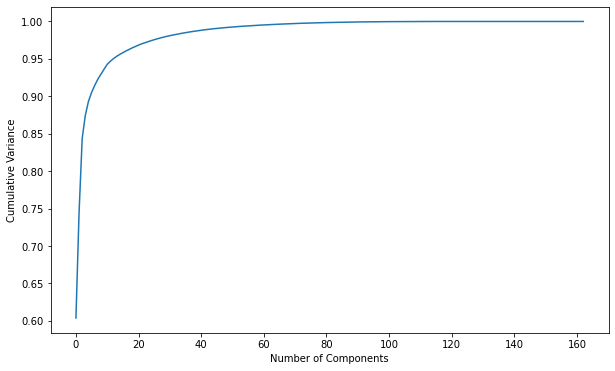

In [72]:
# Let's plot the graph of cumulative vaiance 
fig = plt.figure(figsize = (10,6))
plt.plot(cum_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

In [73]:
# Let's create PCA with 17 components 
pca = PCA(n_components=17,random_state=48)
X_train_pca_final = pca.fit_transform(X_train_scale)
X_test_pca_final = pca.fit_transform(X_test_scale)

#Let's check of pca shape
print(X_train_pca_final.shape)
print(X_test_pca_final.shape)

(44082, 17)
(6001, 17)


In [74]:
# Let's look on correlations
np.corrcoef(X_train_pca_final.transpose())

array([[ 1.00000000e+00, -1.58514960e-16,  5.63212172e-17,
         2.58365185e-16, -3.35536064e-17,  1.10540310e-16,
        -5.69653798e-18, -2.70683821e-16,  2.89183759e-18,
        -8.38947183e-17,  1.74647614e-16, -2.21514146e-16,
        -2.30298201e-16, -1.91504260e-17, -3.09808572e-16,
         7.27730683e-18, -2.23654332e-16],
       [-1.58514960e-16,  1.00000000e+00,  2.65037496e-16,
        -7.71405563e-17,  1.54197132e-16, -4.40154768e-17,
         8.07205760e-17, -4.90987185e-17, -4.53668763e-17,
         2.01674594e-16,  6.51809621e-17, -6.14531226e-18,
        -3.01427846e-17, -6.89754821e-17, -1.55378818e-16,
         3.69576635e-17,  1.07340631e-17],
       [ 5.63212172e-17,  2.65037496e-16,  1.00000000e+00,
        -8.62357508e-17, -3.08960678e-18, -2.61019851e-17,
         2.19270906e-17, -1.58241525e-18, -6.83052446e-17,
        -2.51925141e-17,  2.25757373e-17,  9.73815142e-18,
        -4.35711362e-17,  4.59618738e-17,  1.43756902e-16,
         5.47931314e-18,  9.3

## Model Building:
Let's create model for
Logistic regression
Decision tree
Randomforest


### Logistic Regression 

In [75]:
# Let's create LR model.
lr = LogisticRegression(random_state=40)
lr.fit(X_train_pca_final, y_train_resample)
cv_score = cross_val_score(lr, X_train_pca_final, y_train_resample, cv=5, scoring='f1_micro')

In [76]:
#Let's look on cv socre
print("cv_score: ",cv_score)

cv_score:  [0.82908019 0.84484519 0.84097096 0.83756806 0.8396098 ]


In [77]:
#Let's predict
y_test_pred_lr = lr.predict(X_test_pca_final)
#Let's predcit the probablity
y_pred_prob = lr.predict_proba(X_test_pca_final)

In [78]:
#Let's create a method to return as information about the metrics.
def getMetricsInfoDF(model_name,y_test,y_pred,pred_prob):
    precision = metrics.precision_score(y_test,y_pred)
    recall = metrics.recall_score(y_test,y_pred)
    f1_score = metrics.f1_score(y_test,y_pred)
    roc_auc = metrics.roc_auc_score(y_test,pred_prob)
    return pd.DataFrame({"Model":[model_name],"Precision":[precision],"Recall":[recall],"F1_Score":[f1_score],
                         "ROC_Auc":[roc_auc]})

In [79]:
#Let's calculate the performance of the model
lr_perfm_var = getMetricsInfoDF("LogisticRegression",y_test,y_test_pred_lr,y_pred_prob[:,1])
lr_perfm_var.head()

,Model,Precision,Recall,F1_Score,ROC_Auc
0,LogisticRegression,0.091064,0.553942,0.156415,0.575118


In [80]:
#Let's create and appned on df which will give the glance of the compersion of all the model performace.
model_perfm_df = pd.DataFrame({"Model":[None],"Precision":[None],"Recall":[None],"F1_Score":[None],"ROC_Auc":[None]})
#Let's append it
model_perfm_df = model_perfm_df.append(lr_perfm_var).drop_duplicates()
model_perfm_df

,Model,Precision,Recall,F1_Score,ROC_Auc
0,None,NaN,NaN,NaN,NaN
0,LogisticRegression,0.091064,0.553942,0.156415,0.575118


In [81]:
#Let's create confusion matrix
lr_cm = confusion_matrix(y_test, y_test_pred_lr)
print(lr_cm)

[[2854 2665]
 [ 215  267]]


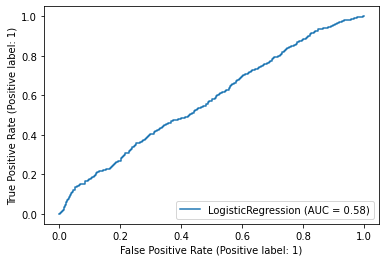

In [82]:
#Plot ROC_AUC Curve for Logistic Regression
metrics.plot_roc_curve(lr, X_test_pca_final, y_test)
plt.show()

### DecisionTree

In [83]:
# Let's create model using DT anad predict on it.
dt=  DecisionTreeClassifier(random_state=40)
dt.fit(X_train_scale, y_train_resample)
cv_score = cross_val_score(dt, X_train_scale, y_train_resample, cv=5, scoring='f1_micro')
print(cv_score)

[0.88261313 0.92480436 0.92774501 0.9292196  0.93432396]


In [84]:
#Let's add hyperparameter tuning
params = dict({"max_leaf_nodes":[4,5,6],"min_samples_leaf":[3,4,5],'min_samples_split':[3,4,5]})
dtc = DecisionTreeClassifier(random_state=40)
dtc_rcv = RandomizedSearchCV(dtc,params,cv=5,scoring="f1_micro")
dtc_rcv.fit(X_train_scale, y_train_resample)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=40),
                   param_distributions={'max_leaf_nodes': [4, 5, 6],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [3, 4, 5]},
                   scoring='f1_micro')

In [85]:
#Let's check best score and estimator
print(dtc_rcv.best_score_)
print(dtc_rcv.best_estimator_)

0.8546802785906701
DecisionTreeClassifier(max_leaf_nodes=6, min_samples_leaf=4,
                       min_samples_split=3, random_state=40)


In [86]:
#Let's add best parameters
dtc = DecisionTreeClassifier(max_leaf_nodes=6,min_samples_leaf=4,min_samples_split=5,random_state=40)
dtc.fit(X_train_scale,y_train_resample)

DecisionTreeClassifier(max_leaf_nodes=6, min_samples_leaf=4,
                       min_samples_split=5, random_state=40)

In [87]:
#Let's apply the prediction on it
y_test_pred_dtc = dtc.predict(X_test_scale)
pred_prob = dtc.predict_proba(X_test_scale)

In [88]:
#Let's check the performance on it
dtc_prfmc_var = getMetricsInfoDF("Decision Tree",y_test,y_test_pred_dtc,pred_prob[:,1])
dtc_prfmc_var.head()

,Model,Precision,Recall,F1_Score,ROC_Auc
0,Decision Tree,0.336904,0.717842,0.458582,0.851062


In [89]:
#Let's add to preformance df for later compression.
model_perfm_df = model_perfm_df.append(dtc_prfmc_var)
model_perfm_df

,Model,Precision,Recall,F1_Score,ROC_Auc
0,None,NaN,NaN,NaN,NaN
0,LogisticRegression,0.091064,0.553942,0.156415,0.575118
0,Decision Tree,0.336904,0.717842,0.458582,0.851062


In [90]:
#Let's look on confusion matrix
dtc_cm = confusion_matrix(y_test, y_test_pred_dtc)
print(dtc_cm)

[[4838  681]
 [ 136  346]]


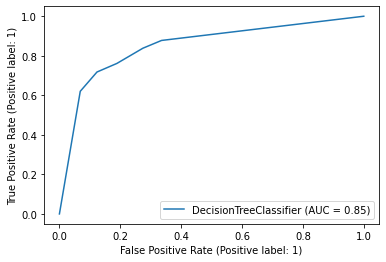

In [91]:
#plot the ROC_AUC curve
metrics.plot_roc_curve(dtc, X_test_scale, y_test)
plt.show()

### Randomforest

In [92]:
#Let's create RM model.
rf_class = RandomForestClassifier(min_samples_leaf=3,n_estimators=120,n_jobs=-1,random_state=40)
rf_class.fit(X_train_scale,y_train_resample)
y_pred_rf = rf_class.predict(X_test_scale)
pred_prob = rf_class.predict_proba(X_test_scale)

In [93]:
#check the scores 
rf_prfmc_var = getMetricsInfoDF("Random Forest",y_test,y_pred_rf,pred_prob[:,1])
rf_prfmc_var.head()

,Model,Precision,Recall,F1_Score,ROC_Auc
0,Random Forest,0.583026,0.655602,0.617188,0.926874


In [94]:
#Let's add to preformance df for later compression.
model_perfm_df = model_perfm_df.append(rf_prfmc_var)
model_perfm_df

,Model,Precision,Recall,F1_Score,ROC_Auc
0,None,NaN,NaN,NaN,NaN
0,LogisticRegression,0.091064,0.553942,0.156415,0.575118
0,Decision Tree,0.336904,0.717842,0.458582,0.851062
0,Random Forest,0.583026,0.655602,0.617188,0.926874


In [95]:
#Let's look on confusion matrix
rf_cm = confusion_matrix(y_test, y_pred_rf)
print(rf_cm)

[[5293  226]
 [ 166  316]]


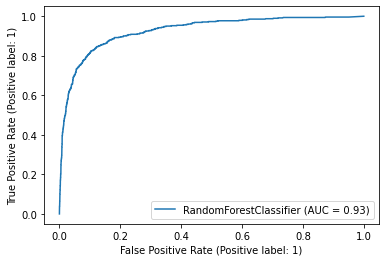

In [96]:
#Let's plot roc auc curve
metrics.plot_roc_curve(rf_class, X_test_scale, y_test)
plt.show()

In [97]:
#Let's compare all 3 models
model_perfm_df

,Model,Precision,Recall,F1_Score,ROC_Auc
0,None,NaN,NaN,NaN,NaN
0,LogisticRegression,0.091064,0.553942,0.156415,0.575118
0,Decision Tree,0.336904,0.717842,0.458582,0.851062
0,Random Forest,0.583026,0.655602,0.617188,0.926874


#### As you can see ,Random forest works very good comapre than others.

In [98]:
#Let's getFeature importance from Random forest
feature_peformance = pd.DataFrame({"columns":X_train.columns,"feature_importance":rf_class.feature_importances_})

In [99]:
#let's look on fetaure impoetance 
feature_peformance.sort_values(by="feature_importance",ascending=False).head(30)

,columns,feature_importance
80,total_ic_mou_8,0.063804
95,total_rech_amt_8,0.050116
59,loc_ic_t2m_mou_8,0.040439
14,roam_og_mou_8,0.037425
65,loc_ic_mou_8,0.036888
11,roam_ic_mou_8,0.035507
119,night_pck_user_8,0.034929
134,fb_user_8,0.034067
2,arpu_8,0.031263
29,loc_og_mou_8,0.028119


## Business Insights

1) Telecom company should focus on roaming calls, they could come up with good offers.

2) The company should focus on the STD and ISD rates well, they could come with good package

3) The company should focus on night pack.

4) Speak to custmore care to know about the concerns and feedback.